# Training models

In [1]:
from data_preprocessing import full_pipeline, splits_to_dataloaders
from random_forest import run_experiment as run_random_forest_experiment
from xg_boost import run_experiment as run_xgboost_experiment
from nn import run_experiment as run_nn_experiment
from linreg import run_experiment as run_linreg_experiment
from utils import write_submissions
import os

In [2]:
data_dir = "./data/"
train_x_path = os.path.join(data_dir, "x_train_T9QMMVq.csv")
train_y_path = os.path.join(data_dir, "y_train_R0MqWmu.csv")
test_x_path = os.path.join(data_dir, "x_test_9F13O5s.csv")

x_train, y_train, x_val, y_val = full_pipeline(
    train_x_path,
    train_y_path, 
    val_proportion=0.2, 
    reduce_features=False, 
    augment=False
)
print("X train shape:", x_train.shape)
print("Y train shape:", y_train.shape)
print("X val shape:", x_val.shape)
print("Y val shape:", y_val.shape)

X train shape: (162346, 14)
Y train shape: (162346, 23)
X val shape: (40587, 14)
Y val shape: (40587, 23)


In [3]:
print("Basic Random Forest")
rf_model = run_random_forest_experiment(x_train, y_train, x_val, y_val)

Basic Random Forest
Training Weighted RMSE: 0.1203
Validation Weighted RMSE: 0.1217


In [4]:
rf_model.predict(x_train.drop("ID", axis=1))[1]

array([0.19836708, 0.03215168, 0.29480075, 0.29480075, 0.00160973,
       0.00160973, 0.03215168, 0.00844024, 0.00384465, 0.02371143,
       0.06745134, 0.03376141, 0.06267226, 0.11249959, 0.        ,
       0.00960859, 0.03390999, 0.01841615, 0.00393383, 0.03215168,
       0.00160973, 0.29480075, 0.0113752 ])

In [5]:
#print("XGBoost")
#xgb_model = run_xgboost_experiment(x_train, y_train, x_val, y_val)

In [6]:
print("2-Stage Linear Model")
linear_model = run_linreg_experiment(x_train, y_train, x_val, y_val, alpha=0.05)

2-Stage Linear Model
Training SelectiveLinearRegressor model...
Feature selection results:
c01: 13 features selected - Humidity, M12, M13, M14, M15, M4, M5, M6, M7, R, S1, S2, S3
c02: 12 features selected - Humidity, M12, M13, M14, M15, M4, M6, M7, R, S1, S2, S3
c03: 13 features selected - Humidity, M12, M13, M14, M15, M4, M5, M6, M7, R, S1, S2, S3
c04: 13 features selected - Humidity, M12, M13, M14, M15, M4, M5, M6, M7, R, S1, S2, S3
c05: 12 features selected - Humidity, M12, M13, M14, M15, M4, M6, M7, R, S1, S2, S3
c06: 12 features selected - Humidity, M12, M13, M14, M15, M4, M6, M7, R, S1, S2, S3
c07: 12 features selected - Humidity, M12, M13, M14, M15, M4, M6, M7, R, S1, S2, S3
c08: 13 features selected - Humidity, M12, M13, M14, M15, M4, M5, M6, M7, R, S1, S2, S3
c09: 11 features selected - Humidity, M12, M13, M14, M15, M4, M5, M6, R, S1, S2
c10: 13 features selected - Humidity, M12, M13, M14, M15, M4, M5, M6, M7, R, S1, S2, S3
c11: 13 features selected - Humidity, M12, M13, M14, 

In [7]:
linear_model.predict(x_train.drop("ID", axis=1))[1]

array([ 0.32079685,  0.03675982,  0.39591814,  0.39591814,  0.03036725,
        0.03036725,  0.03675982,  0.00115615, -0.01506996,  0.03556549,
        0.10047261,  0.06705133,  0.00799369,  0.17407124,  0.        ,
        0.01134812, -0.03692825,  0.0462636 , -0.01003571,  0.03675982,
        0.03036725,  0.39591814,  0.05876527])

Neural Network
Number of trainable parameters: 4247


Epoch 5/5 - Train Loss: 0.0892, Val Loss: 0.0668, LR: 0.010000: 100%|██████████| 5/5 [00:39<00:00,  7.99s/it]


Validation Weighted RMSE: 0.0668


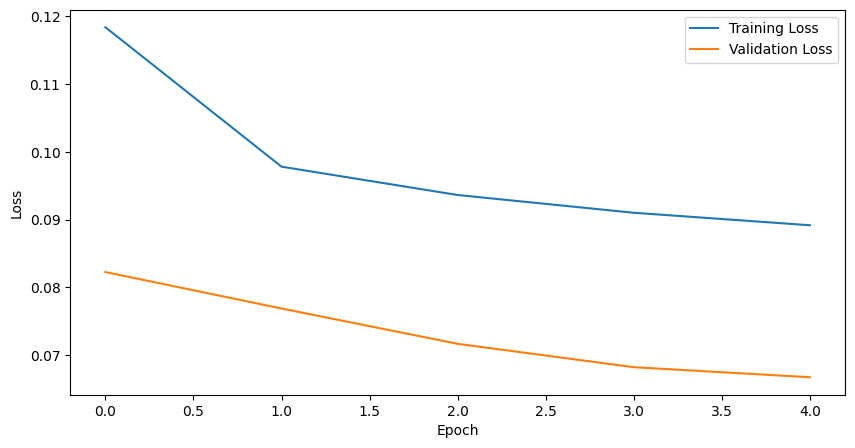

In [7]:
print("Neural Network")
params = {
    "model_class": "NNRegressor",
    "model_params": {
        "hidden_dim": 64,
        "num_output": 23,
        "bias": True,
        "dropout_rate": 0.2,
    },
    "training_param": {
        "n_epochs": 5,
        "lr": 0.01,
        "weight_decay": 1e-5,
        "batch_size": 128,
    },
}
try:
    nn_model = run_nn_experiment(x_train, y_train, x_val, y_val, params=params, verbose=True, plot_losses=True)
except KeyboardInterrupt:
    print("Training interrupted.")

Neural Network
Number of trainable parameters: 8943


Epoch 5/5 - Train Loss: 0.1173, Val Loss: 0.1181, LR: 0.010000: 100%|██████████| 5/5 [01:30<00:00, 18.07s/it]


Validation Weighted RMSE: 0.1181


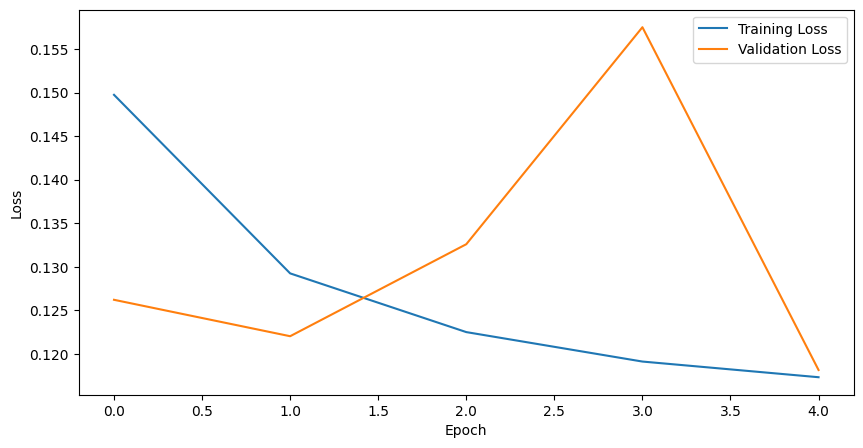

In [3]:
print("Neural Network")
params = {
    "model_class": "GasDetectionModel",
    "model_params": {
        "hidden_dim": 64,
        "num_output": 23,
        "bias": True,
        "dropout_rate": 0.3,
    },
    "training_param": {
        "n_epochs": 5,
        "lr": 0.01,
        "weight_decay": 1e-5,
        "batch_size": 128,
    },
}
try:
    nn_model = run_nn_experiment(x_train, y_train, x_val, y_val, params=params, verbose=True, plot_losses=True)
except KeyboardInterrupt:
    print("Training interrupted.")

In [11]:
import torch
donne = x_val.iloc[0]
nn_model(torch.tensor(donne).float().unsqueeze(0))

/var/folders/l_/mg5njj1n7nl377cq831ycwnc0000gr/T/ipykernel_45880/974138528.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nn_model(torch.tensor(donne).float().unsqueeze(0))


tensor([[3.3021e-01, 4.9465e-03, 5.0988e-01, 5.0988e-01, 4.0155e-02, 4.0155e-02,
         4.9465e-03, 6.2781e-05, 3.5150e-03, 7.0327e-03, 3.8065e-03, 3.4778e-02,
         3.2974e-02, 1.5101e-01, 5.8658e-05, 1.4545e-03, 6.7869e-03, 8.2392e-02,
         5.8408e-04, 4.9465e-03, 4.0155e-02, 5.0988e-01, 2.7343e-02]],
       grad_fn=<SigmoidBackward0>)

Neural Network
Number of trainable parameters: 6551


Epoch 5/5 - Train Loss: 0.0854, Val Loss: 0.0617, LR: 0.010000: 100%|██████████| 5/5 [00:45<00:00,  9.03s/it]


Validation Weighted RMSE: 0.0617


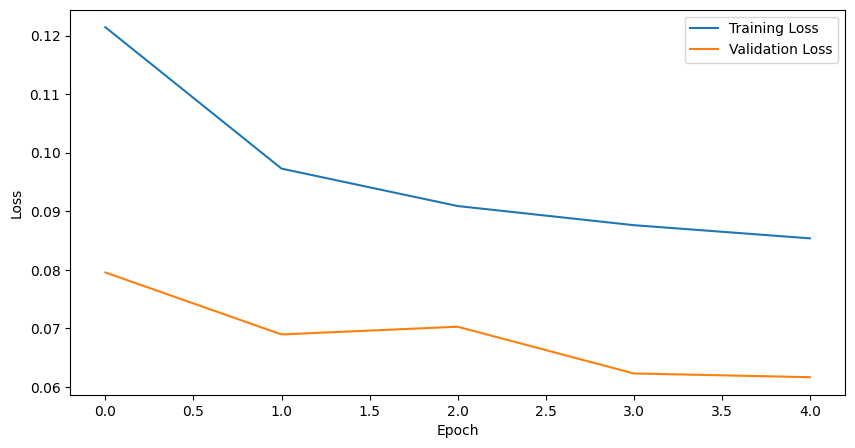

In [9]:
print("Neural Network")
params = {
    "model_class": "NNRegressorV2",
    "model_params": {
        "hidden_dim": 64,
        "num_output": 23,
        "bias": True,
        "dropout_rate": 0.3,
    },
    "training_param": {
        "n_epochs": 5,
        "lr": 0.01,
        "weight_decay": 1e-5,
        "batch_size": 128,
    },
}
try:
    nn_model = run_nn_experiment(x_train, y_train, x_val, y_val, params=params, verbose=True, plot_losses=True)
except KeyboardInterrupt:
    print("Training interrupted.")

In [11]:
write_submissions(nn_model, test_x_path, "submissions_nn_v1.csv")